
🔍 Debug: Extracted PDF Text (First 1000 chars)
 FOR IMMEDIATE RELEASE INVESTOR CONTACT: MEDIA CONTACT: Frank Morgan Harlow Sumerford 615-344-2688 615-344-1851 HCA HEALTHCARE REPORTS FOURTH QUARTER 2024 RESULTS AND PROVIDES 2025 GUIDANCE Nashville, Tenn., January 24, 2025 – HCA Healthcare, Inc. (NYSE: HCA) today announced financial and operating results for the fourth quarter ended December 31, 2024. Key fourth quarter metrics (all percentage changes compare 4Q 2024 to 4Q 2023 unless otherwise noted):  Revenues totaled $18.285 billion  Net income attributable to HCA Healthcare, Inc. totaled $1.438 billion, or $5.63 per diluted share (which includes an estimated $0.60 per diluted share unfavorable impact from Hurricanes Helene and Milton)  Adjusted EBITDA totaled $3.712 billion  Cash flows from operating activities totaled $2.559 billion  Same facility admissions increased 3.0 percent and same facility equivalent admissions increased 3.1 percent "We finished 2024 with strong busine

/tmp/ipykernel_618092/3765065808.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freq), y=list(words), palette="viridis")


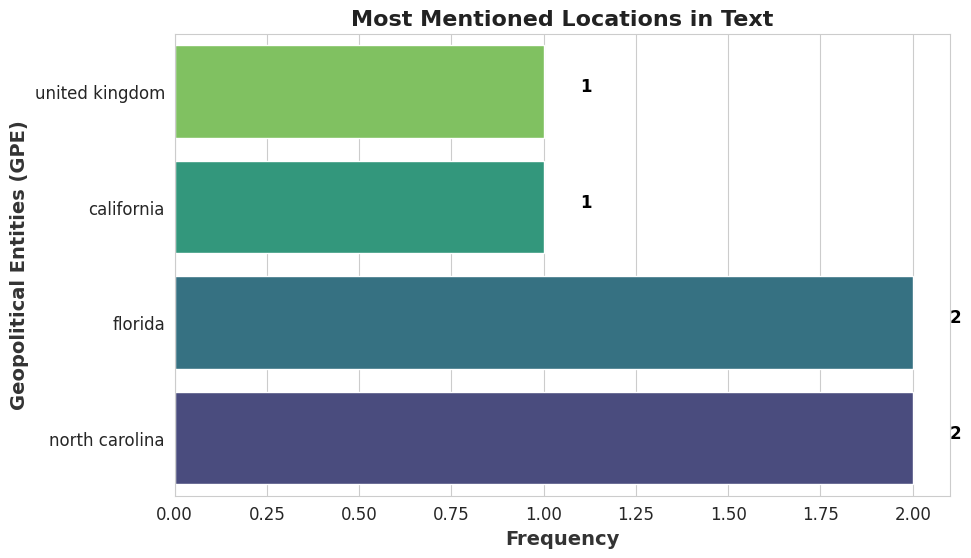

In [ ]:
import pdfplumber
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

nlp = spacy.load("en_core_web_sm")

def extract_text_from_pdf(pdf_path):
    """Extract text from a single PDF file using pdfplumber."""
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            raw_text = page.extract_text() or ""
            cleaned_text = re.sub(r'\s+', ' ', raw_text).strip()
            cleaned_text = re.sub(r'Page \d+ of \d+', '', cleaned_text)
            text += cleaned_text + " "
    return text

def preprocess_text(text):
    """Tokenizes, removes stopwords, and normalizes text using spaCy."""
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

def extract_entities(text):
    """Extracts named entities (only GPE) using spaCy's built-in NER model."""
    doc = nlp(text)
    extracted_entities = {"GPE": []}
    
    for ent in doc.ents:
        if ent.label_ in extracted_entities:
            extracted_entities[ent.label_].append(ent.text)
    
    print("\nDebug: Extracted Entities\n", extracted_entities)
    
    return extracted_entities

def visualize_data(entities):
    """Creates an intuitive, well-designed entity distribution plot."""
    sns.set_style("whitegrid")
    sns.set_palette("coolwarm")

    entity_counts = Counter(entities["GPE"])
    
    if not entity_counts:
        print("\n⚠️ No entities found for visualization.")
        return
    
    words, freq = zip(*entity_counts.most_common(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(freq), y=list(words), palette="viridis")

    plt.xlabel("Frequency", fontsize=14, fontweight="bold", color="#333")
    plt.ylabel("Geopolitical Entities (GPE)", fontsize=14, fontweight="bold", color="#333")
    plt.title("Most Mentioned Locations in Text", fontsize=16, fontweight="bold", color="#222")

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().invert_yaxis()

    for i, v in enumerate(freq):
        plt.text(v + 0.1, i, str(v), color="black", fontsize=12, fontweight="bold")

    plt.show()

if __name__ == "__main__":
    pdf_path = "Data/sample.pdf"
    raw_text = extract_text_from_pdf(pdf_path)
    
    clean_text = preprocess_text(raw_text)
    entities = extract_entities(clean_text)

    print("\nExtracted Entities:", entities)
    visualize_data(entities)



🔍 Debug: Extracted PDF Text (First 1000 chars)
  Market Research in Health and Social Care This text provides a comprehensive and rigorous introduction to the relevance, planning and management of market research in the areas of health and social care which have developed in Britain and most industrialized countries. There is a growing need for market research to support the global trends in the health and social care policies which place increasing emphasis on the views of service users and the public at large. Coupled with this is the pressure to target resources, achieve value for money and evaluate the effectiveness of services. Market research has a major contribution to make to these needs. Market Research in Health and Social Care draws on the practical experience gained from more than a decade of developing and applying innovative techniques. It is intended for managers and professionals, planners and purchasers, and students of public services management and marketing, and co

/tmp/ipykernel_618092/3765065808.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freq), y=list(words), palette="viridis")


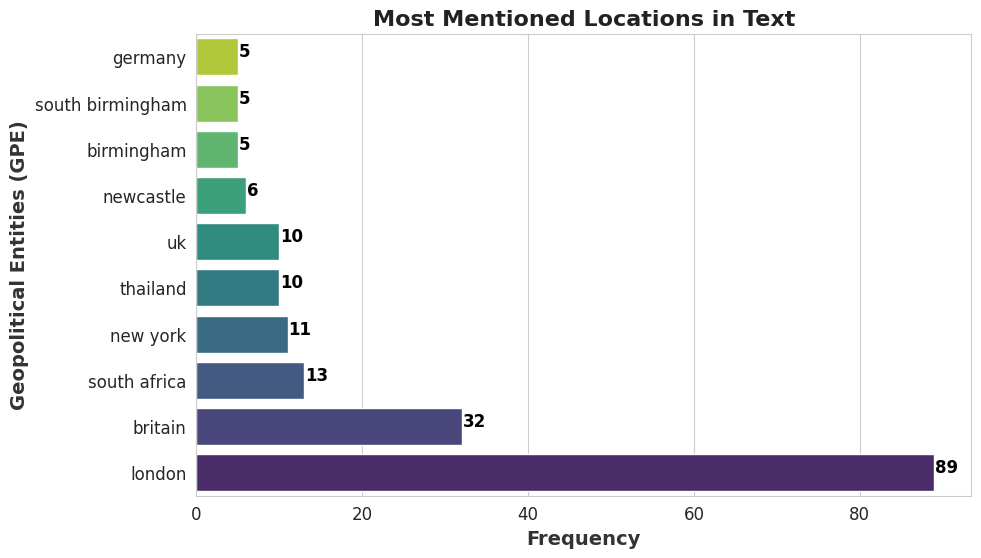

In [33]:
if __name__ == "__main__":
    pdf_path = "Data/sample2.pdf"  # Update this with your PDF path
    raw_text = extract_text_from_pdf(pdf_path)
    print("\n🔍 Debug: Extracted PDF Text (First 1000 chars)\n", raw_text[:1000])  # Debugging
    
    clean_text = preprocess_text(raw_text)
    entities = extract_entities(clean_text)

    print("\nExtracted Entities:", entities)
    visualize_data(entities)
